This notebook contains an example on how to use PowerSpec.
- Author : Adekunle Ajayi
- Affiliation : Institut des Géosciences de l'Environnement (IGE), Université Grenoble Alpes, France.
- PowerSpec : https://github.com/adeajayi-kunle/PowerSpec

In [1]:
# - Load python modules
import sys,glob
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline 
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0, "/Users/adekunle/lib/python/regular/")
import OpenDataSet as op
import PowerSpec as ps
import Plot_PowerSpec as pp

## 0 - Load Data

In [3]:
# - Define data path
database = '/Users/adekunle/Data/NATL60_Data/'
grid_file = database + 'Grid/NATL60_coordinates_v4.nc'
ssh_file = database + 'NcFiles/NATL60-CJM165_y2013m02.1d.SSH.nc'

In [4]:
# - Define box dimension 
latmin=30.0; latmax=40.0;
lonmin=-50.0; lonmax=-40.0;

In [5]:
# - extract box coordinates
navlon,navlat,jmin,jmax,imin,imax = op.read_datagrid(grid_file,latmin=latmin,latmax=latmax,lonmin=lonmin,lonmax=lonmax)
# - extract data
boxdata = op.read_data(ssh_file,jmin,jmax,imin,imax,model='NATL60',varname='sossheig')
boxdata= ma.masked_invalid(boxdata)

In [6]:
boxdata.shape

(28, 730, 598)

## 1 - Define plot function

In [7]:
# - general slopes
k = np.array([1E-6,1E-3])
s5 = k**-5/1.e22 # k-5  QG
s4 = k**-4/1.e17 # k-4
s113 = k**(-11./3.)/1.e15 # k-11/3 SQG

In [8]:
# - Define plot function
def plot_spec(kspec,pspec,title):
    global k,s5,s3,s113
    fig = plt.figure(figsize=(12,4))
    plt.suptitle(title,size = 16,y=1.05)
    
    axis1 = fig.add_subplot(131)
    plt.loglog(k,s5,'k-',label=r'$k^{-5}$')
    plt.loglog(k,s4,'k-.',label=r'$k^{-4}$')
    plt.loglog(k,s113,'k--',label=r'$k^{-11/3}$')
    plt.loglog(kspec,pspec,'g',linewidth=2)
    plt.xlim(1E-6,1E-3)
    plt.ylim(1E-10,1E4)
    plt.xlabel('cpm')
    plt.ylabel('$m^2$/cpm')
    plt.title('SSH Spectra')
    plt.grid(True)
    plt.legend(loc=3)

    axis2 = fig.add_subplot(132)
    pp.plot_spectrum(kspec,pspec,10*1E3,100*1E3)
    plt.title('Slope : 10km - 100km')
    plt.ylim(1E-10,1E4)
    
    axis3 = fig.add_subplot(133)
    pp.plot_spectrum(kspec,pspec,70*1E3,250*1E3)
    plt.title('Slope : 70km - 250km')
    plt.ylim(1E-10,1E4)

## 2 - Compute Spectrum

In [9]:
# - get data for day1
vardata = boxdata[0]
# - interpolate data
x,y,data = ps.interpolate(vardata,navlon,navlat)

In [10]:
# - check if data contains nan. If yes,replace with interpolated values.
data = ps.isdata_contain_nan(data)

In [11]:
ps.get_spectrum?

Signature: ps.get_spectrum(data, x, y, window='Tukey', detrend='Both')
Docstring:
data_reg : Interpolated data.
x_reg and y_reg : interpolate coordinates in meters.
window : None , 'Hanning' or 'Tukey' (tappered consine window with /apha = 0.5).
detrend :
if "both" : detrend the 2D data along both axes.
if "zonal" : detrend the data in the zonal direction only
if "RemoveMean" : Remove only the mean of the data
if 'RmeanDtrend' : Remove the mean then detrend the data in both direction
if None : use the raw data
File:      ~/lib/python/regular/PowerSpec.py
Type:      function


In [12]:
# - compute sepctrum
kspec,pspec = ps.get_spectrum(data,x,y)

## 3 - Plot Spectrum

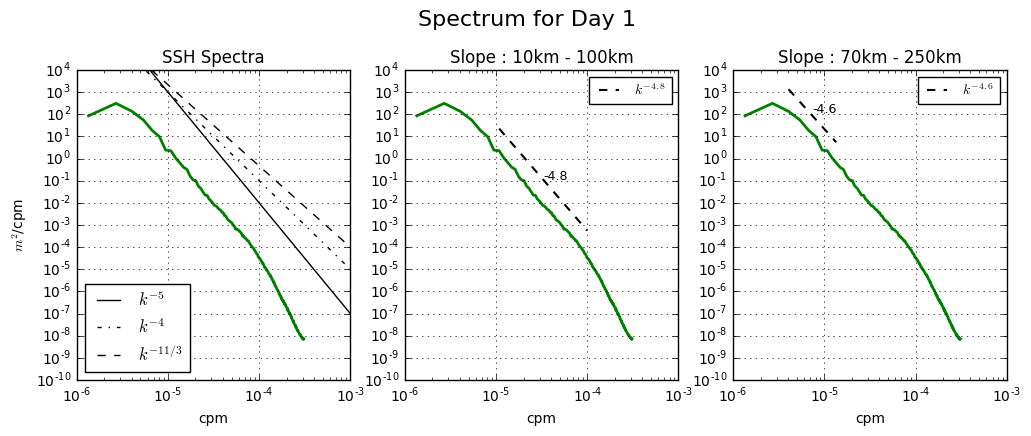

In [13]:
title = 'Spectrum for Day 1'
plot_spec(kspec,pspec,title)